In [7]:
!pip3 install wordcloud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from datetime import datetime
from prophet import Prophet


d:\PyAnaconda\envs\Anaconda_environment\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
issues_df = pd.read_csv("D:/github_repo/BAOCAO_SQT/DATA_PYTHON/data_processed/issues_cleaned.csv")

C:\Users\PC\AppData\Local\Temp\ipykernel_13648\1906617594.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['labels'] = data_cleaned['labels'].apply(lambda x: len(eval(x)))  # Đếm số nhãn (chuyển từ list)


MAE: 8034.9632397228415


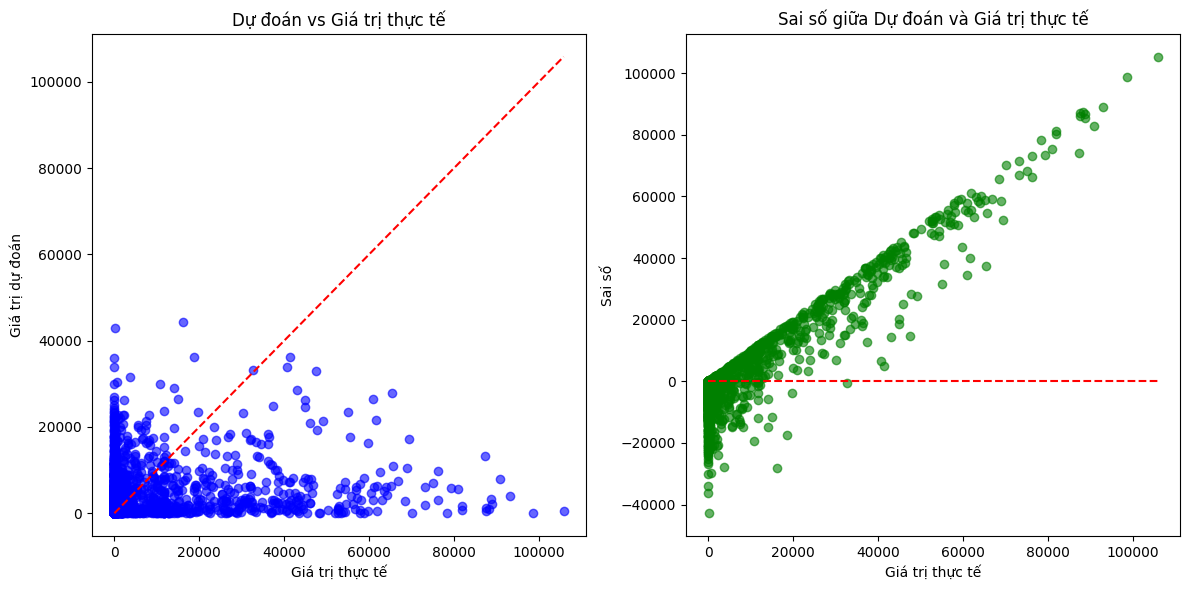

In [2]:
# Load dữ liệu
data = pd.read_csv("D:/github_repo/BAOCAO_SQT/DATA_PYTHON/data_processed/issues_cleaned.csv")

# Tiền xử lý
data['created_at'] = pd.to_datetime(data['created_at'])
data['closed_at'] = pd.to_datetime(data['closed_at'])

# Tính thời gian đóng
data['time_to_close'] = (data['closed_at'] - data['created_at']).dt.total_seconds() / 3600  # giờ

# Loại bỏ các dòng có NaN trong cột 'time_to_close' để đảm bảo X và y có cùng số lượng mẫu
data_cleaned = data.dropna(subset=['time_to_close'])

# Chuyển nhãn thành số
data_cleaned['labels'] = data_cleaned['labels'].apply(lambda x: len(eval(x)))  # Đếm số nhãn (chuyển từ list)

# Chuyển tiêu đề thành vector đặc trưng
vectorizer = TfidfVectorizer(stop_words='english')
X_title = vectorizer.fit_transform(data_cleaned['title'])

# Kết hợp các đặc trưng
X = np.hstack([X_title.toarray(), data_cleaned[['labels']].values])
y = data_cleaned['time_to_close']

# Chia tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))

# Trực quan hóa kết quả
plt.figure(figsize=(12, 6))

# Scatter plot giữa giá trị thực tế và dự đoán
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('Dự đoán vs Giá trị thực tế')

# Biểu đồ sai số giữa giá trị thực tế và dự đoán
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test - y_pred, color='green', alpha=0.6)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), color='red', linestyle='--')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Sai số')
plt.title('Sai số giữa Dự đoán và Giá trị thực tế')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


11:24:18 - cmdstanpy - INFO - Chain [1] start processing
11:24:18 - cmdstanpy - INFO - Chain [1] done processing
d:\PyAnaconda\envs\Anaconda_environment\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


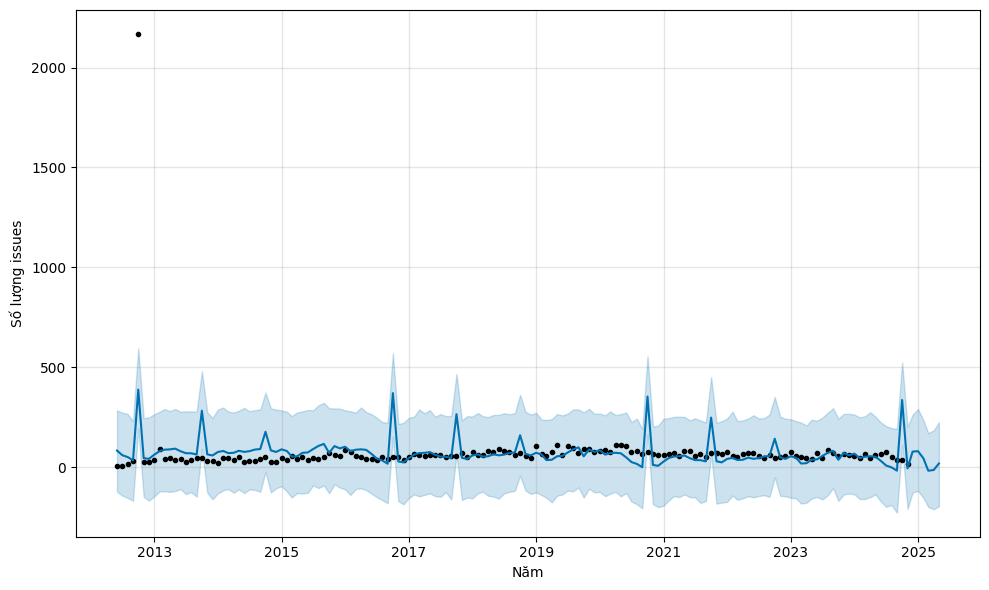

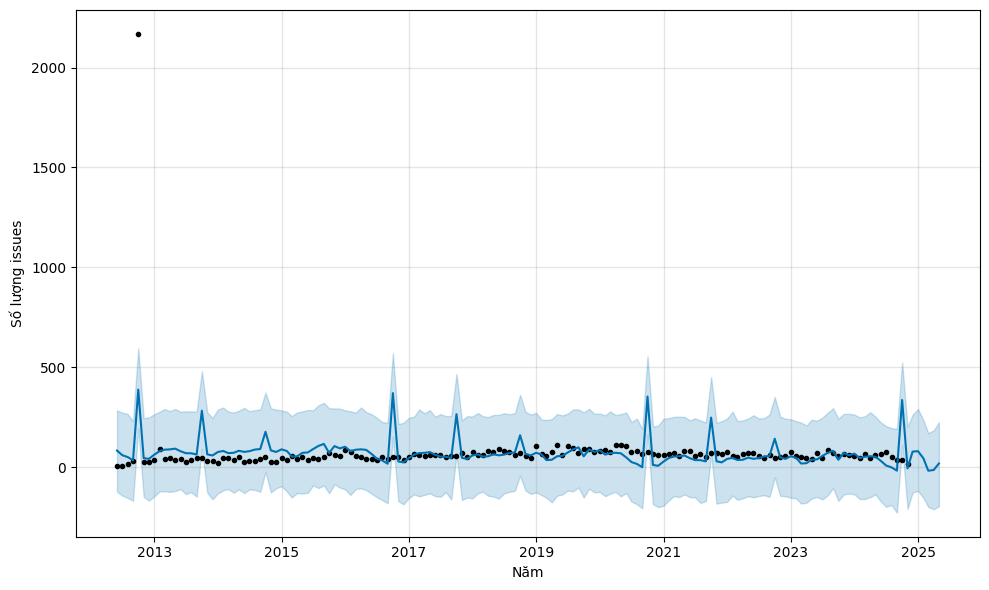

In [3]:

issues_df['created_at'] = pd.to_datetime(issues_df['created_at'], errors='coerce')

# Chuẩn bị dữ liệu cho Prophet
issue_trend = issues_df.groupby(issues_df['created_at'].dt.to_period('M')).size().reset_index(name='issue_count')

issue_trend.columns = ['ds', 'y']  # Đổi tên cột cho Prophet
issue_trend['ds'] = issue_trend['ds'].dt.to_timestamp()

issue_trend['ds'] = pd.to_datetime(issue_trend['ds'])  # Đảm bảo 'ds' là datetime

# Khởi tạo và huấn luyện mô hình Prophet
model = Prophet()
model.fit(issue_trend)

# Dự báo trong 6 tháng tiếp theo
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

# Vẽ biểu đồ
model.plot(forecast,ylabel='Số lượng issues',xlabel='Năm')



In [8]:
issue_trend = issues_df.groupby(issues_df['created_at'].dt.to_period('M')).size().reset_index(name='issue_count')
issue_trend

,created_at,issue_count
0,2012-06,9
1,2012-07,6
2,2012-08,15
3,2012-09,31
4,2012-10,2168
...,...,...
145,2024-07,76
146,2024-08,52
147,2024-09,38
148,2024-10,35
